In [1]:
import numpy as np

import exp3aux.exp3aux as ex3aux
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

plt.rcParams.update({'font.size': 14})

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTclone/BAMT/experiments2/images2'

In [2]:
ex3aux.simulation(9)

mean, min and max precision on right direction: 0.453 0.067 0.762 

mean, min and max precision on wrong direction: 0.300 0.167 0.600 

mean, min and max precision on ascending relations: 0.786 0.444 1.000 

mean, min and max precision on descending relations: 0.732 0.429 1.000 

mean, min and max precision on wrong edges among all in BN: 0.745 0.650 0.857 



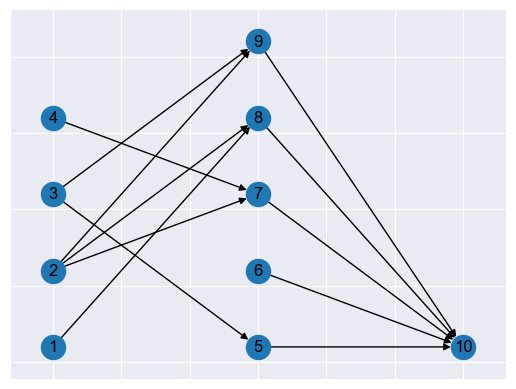

In [4]:
edges, into_degree, out_degree, position = ex3aux.DAGs_generate(n=9, max_out=3, random_state=42+11)
bn_graph = nx.DiGraph()
bn_graph.add_edges_from(edges)
bn_graph.add_nodes_from(list(range(1, 9+1)))
plt.figure()
nx.draw_networkx(bn_graph, arrows=True, pos=position)
plt.show()

In [2]:
for i in range(4, 16):
    print(f"{i} nodes")
    ex3aux.simulation(i)

4 nodes
mean, min and max precision on right direction: 0.500 0.222 1.000 

mean, min and max precision on wrong direction: 0.400 0.000 0.667 

5 nodes
mean, min and max precision on right direction: 0.571 0.250 0.833 

mean, min and max precision on wrong direction: 0.304 0.083 0.667 

6 nodes
mean, min and max precision on right direction: 0.546 0.250 0.944 

mean, min and max precision on wrong direction: 0.342 0.056 0.667 

7 nodes
mean, min and max precision on right direction: 0.602 0.375 0.733 

mean, min and max precision on wrong direction: 0.287 0.042 0.476 

8 nodes
mean, min and max precision on right direction: 0.568 0.200 0.867 

mean, min and max precision on wrong direction: 0.309 0.074 0.556 

9 nodes


IndexError: list index out of range

In [2]:
for i in range(4, 11):
    print(f"{i} nodes")
    ex3aux.simulation(i, transitive_mode=True)

9 nodes
mean, min and max precision on right direction: 0.368 0.037 0.704 

mean, min and max precision on wrong direction: 0.320 0.140 0.762 

10 nodes


KeyboardInterrupt: 

[(1, 4), (2, 3)]

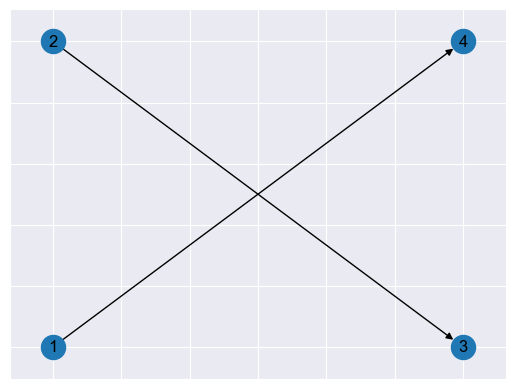

In [11]:
n=4
edges,into_degree,out_degree,position = ex3aux.DAGs_generate(n=n, max_out=2, random_state=42)

ex3aux.plot_DAG(edges, position)
edges

In [5]:
bn_graph = nx.DiGraph()
bn_graph.add_edges_from(edges)
bn_graph.add_nodes_from(list(range(1, n+1)))
nx.adjacency_matrix(bn_graph, nodelist=list(range(1, 6))).todense()
bn_graph.number_of_nodes()

NetworkXError: Node 4 in nodelist is not in G

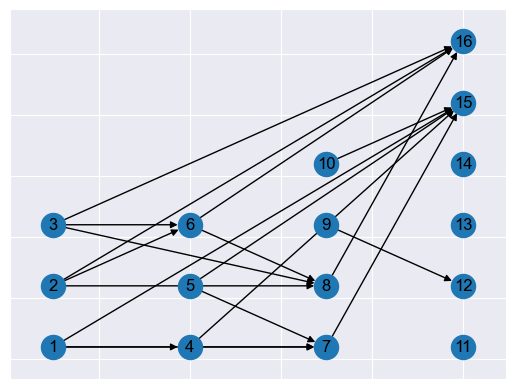

In [47]:
bg_trenc = nx.transitive_closure(bn_graph)
nx.draw_networkx(bg_trenc, arrows=True, pos=position)

In [48]:
adj_m=ex3aux.set_signs(bn_graph)

In [49]:
adj_m

matrix([[ 0.    ,  0.    ,  0.    , -0.502 ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.803 ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.9277,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.3945,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -1.376 ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         -1.376 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.  

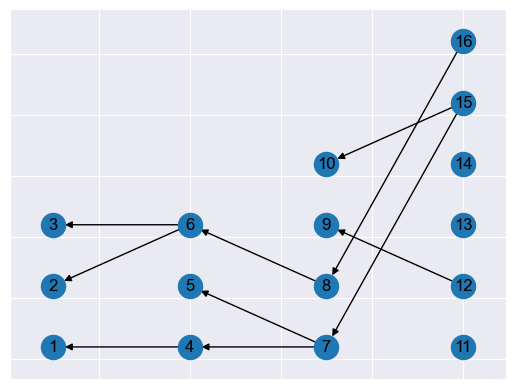

In [50]:
nx.draw_networkx(bn_graph.reverse(), arrows=True, pos=position)

In [51]:
def get_adjacency_matrix_transitive(adj_m, bn_graph):
    # создаём матрицу линейных соотношений в транзитивном замыкании
    M = np.zeros_like(adj_m)
    for J in range(n, 0, -1):
        #посещаем каждую вершину в обратном обходе
        for j, i in nx.dfs_edges(bn_graph.reverse(), source=J):
            # от каждой обходим граф в глубину для связывания линейных соотношений
            if j == J:
                M[i-1, J-1] = adj_m[i-1, j-1]
            for j1, i1 in nx.bfs_edges(bn_graph.reverse(), source=i, depth_limit=1):
                # перемножаем
                M[i1-1, J-1] += M[i-1, J-1]*adj_m[i1-1, j1-1]
    return M

1.465 (8, 16) -1.376 (6, 8)
-2.016
-2.016 (6, 16) 1.803 (2, 6)
-3.633
-2.016 (6, 16) 0.9277 (3, 6)
-1.87
-1.768 (7, 15) 0.3945 (4, 7)
-0.6973
-1.768 (7, 15) -1.376 (5, 7)
2.432
-0.6973 (4, 15) -0.502 (1, 4)
0.35
-1.376 (6, 8) 1.803 (2, 6)
-2.48
-1.376 (6, 8) 0.9277 (3, 6)
-1.276
0.3945 (4, 7) -0.502 (1, 4)
-0.198


In [52]:
bn_graph.number_of_nodes()

matrix([[ 0.    ,  0.    ,  0.    , -0.502 ,  0.    ,  0.    , -0.198 ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.35  ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.803 ,  0.    ,
         -2.48  ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    , -3.633 ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.9277,  0.    ,
         -1.276 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    , -1.87  ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.3945,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         -0.6973,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -1.376 ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          2.432 ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         -1.376 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.  

In [53]:
adj_m

matrix([[ 0.    ,  0.    ,  0.    , -0.502 ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.803 ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.9277,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.3945,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -1.376 ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         -1.376 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.  

In [7]:
#def set_signs_of_closure(G, adj_m):
#    adj_m_cl = copy.deepcopy(adj_m)
#    for i in range(G.number_of_nodes()-1, -1, -1):
#        print(np.nonzero(adj_m[:, i])[0])
#        adj_m_cl[]
#    return 0
#set_signs_of_closure(bn_graph, adj_m)

SyntaxError: invalid syntax (<ipython-input-7-9038858f466b>, line 5)

In [8]:
#list(bg_trenc.edges)

[(1, 5), (2, 3), (2, 5), (2, 4)]

In [10]:
names = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth']

In [10]:
instantiate_gradation_relation(names, adj_m)

[['first0', 'fifth2'],
 ['first1', 'fifth1'],
 ['first2', 'fifth0'],
 ['second0', 'third0'],
 ['second1', 'third1'],
 ['second2', 'third2'],
 ['second0', 'fourth0'],
 ['second1', 'fourth1'],
 ['second2', 'fourth2'],
 ['second0', 'fifth0'],
 ['second1', 'fifth1'],
 ['second2', 'fifth2']]

[]
[]
[1]
[1]
[0 1]


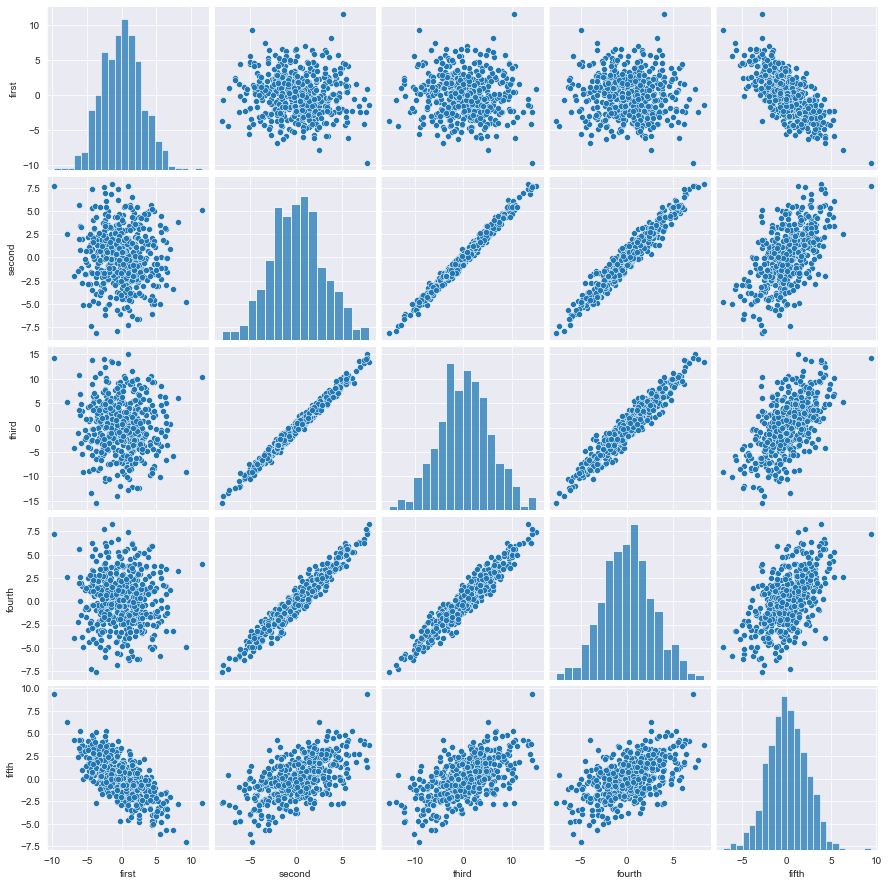

In [11]:
data = build_dataset(adj_m, names, 500)
sns.pairplot(data)

Смотрим на обнаружение реальных рёбер (с точностью до направления) при переменном числе признаков:
- относительно связей, заданных изначальным графом, а также относительно его транзитивного замыкания (? возможно,)
- для последнего нужна матрица смежности со знаками, а также это всё зависит от величин коэффициентов: ситуация со связью

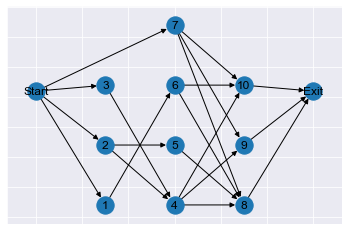

In [8]:
edges,into_degree,out_degree,position = DAGs_generate(n=10, max_out=5, random_state=42)

plot_DAG(edges, position)

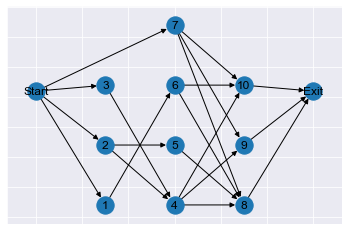

In [9]:
edges,into_degree,out_degree,position = DAGs_generate(n=10, max_out=5, random_state=42)

plot_DAG(edges, position)

In [7]:
data.head(10)

,origin1,origin2,origin3,cubed_o1,negative_root3_o2,hyperbola_o3,combined_cn,combined_nh,combined_ch,combined_cno3,combined_co2h,combined_o1nh
0,2.119492,0.737207,0.312454,0.058769,-0.992276,0.488902,-0.933507,-0.503373,0.547671,-0.621053,1.284878,1.616118
1,-2.625095,0.031537,0.776028,-0.293367,-0.484123,0.586394,-0.777490,0.102271,0.293027,-0.001462,0.324564,-2.522824
2,-2.894855,0.009888,1.209078,-0.468985,-0.142113,0.602876,-0.611097,0.460763,0.133891,0.597981,0.143779,-2.434091
3,2.688882,0.292918,0.395079,0.376103,-0.800458,0.684562,-0.424355,-0.115896,1.060665,-0.029276,1.353584,2.572987
4,1.990172,0.243591,2.290462,0.272118,-0.483364,0.209023,-0.211245,-0.274341,0.481141,2.079217,0.724732,1.715831
5,0.055618,1.007663,0.193023,-0.028964,-0.966945,0.566283,-0.995909,-0.400662,0.537319,-0.802887,1.544982,-0.345044
6,1.978326,1.391204,1.796556,0.277852,-1.020400,0.693850,-0.742548,-0.326550,0.971702,1.054008,2.362905,1.651775
7,2.810375,0.138295,1.485132,0.336994,-0.581798,0.397911,-0.244804,-0.183887,0.734905,1.240328,0.873199,2.626487
8,1.026379,0.008179,2.807084,-0.097354,-0.313829,0.172240,-0.411183,-0.141589,0.074885,2.395901,0.083065,0.884790
9,-0.542534,0.038656,1.574959,-0.017011,-0.372894,0.700862,-0.389905,0.327968,0.683852,1.185054,0.722508,-0.214566


In [17]:
kresult = construct_by_kmeans(data, [])
kbn = kresult['bn']


In [9]:
kencoder, data_kdiscretized_enc = kresult['encoder'], kresult['disc_data']

In [10]:
#print_histogram('origin1', data, data_kdiscretized_enc, kencoder)

In [11]:
#('hyperbola', data, data_kdiscretized_enc, kencoder)

In [12]:
#print_histogram('negative_root3', data, data_kdiscretized_enc, kencoder)

In [13]:
#print_histogram('cubed', data, data_kdiscretized_enc, kencoder)

In [14]:
#c=kbn.plot_for_specific_nodes(['marker0', 'marker1', 'marker2'], imagespath , "subkbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

In [19]:
relationships_1dep = [
    ['origin1', 'cubed_o1', 1],
    ['origin2', 'negative_root3_o2', -1],
    ['origin3', 'hyperbola_o3', -1]]

relationships_2dep = [
    ['cubed_o1', 'combined_cn', 1],
    ['negative_root3_o2', 'combined_cn', 1],
    ['origin1', 'combined_cn', 1],
    ['origin2', 'combined_cn', -1],

    ['negative_root3_o2', 'combined_nh', 1],
    ['hyperbola_o3', 'combined_nh', 1],
    ['origin2', 'combined_nh', -1],
    ['origin3', 'combined_nh', -1],

    ['cubed_o1', 'combined_ch', 1],
    ['hyperbola_o3', 'combined_ch', 1],
    ['origin1', 'combined_ch', 1],
    ['origin3', 'combined_ch', -1],
]

relationships_3dep = [
    ['cubed_o1', 'combined_cno3', 1],
    ['negative_root3_o2', 'combined_cno3', 1],
    ['origin1', 'combined_cno3', 1],
    ['origin2', 'combined_cno3', -1],
    ['origin3', 'combined_cno3', 1],

    ['cubed_o1', 'combined_co2h', 1],
    ['hyperbola_o3', 'combined_co2h', 1],
    ['origin1', 'combined_co2h', 1],
    ['origin2', 'combined_co2h', 1],
    ['origin3', 'combined_co2h', -1],

    ['negative_root3_o2', 'combined_o1nh', 1],
    ['hyperbola_o3', 'combined_o1nh', 1],
    ['origin1', 'combined_o1nh', 1],
    ['origin2', 'combined_o1nh', -1],
    ['origin3', 'combined_o1nh', -1],
]
realtionships = relationships_1dep + relationships_2dep + relationships_3dep

true_edges = list()
true_edges_bydep = [None, None, None]
states=[0,1,2]
def get_true_edges(relationships):
    result = list()
    for rel in relationships:
        result+=([[rel[0]+str(i), rel[1]+str(j)] for i, j in zip(states, states[::rel[2]])])
    return result

for i, rels in enumerate([relationships_1dep, relationships_2dep, relationships_3dep]):
    true_edges_bydep[i] = get_true_edges(rels)
true_edges = sum(true_edges_bydep, start=[])

In [20]:
true_edges

[['origin10', 'cubed_o10'],
 ['origin11', 'cubed_o11'],
 ['origin12', 'cubed_o12'],
 ['origin20', 'negative_root3_o22'],
 ['origin21', 'negative_root3_o21'],
 ['origin22', 'negative_root3_o20'],
 ['origin30', 'hyperbola_o32'],
 ['origin31', 'hyperbola_o31'],
 ['origin32', 'hyperbola_o30'],
 ['cubed_o10', 'combined_cn0'],
 ['cubed_o11', 'combined_cn1'],
 ['cubed_o12', 'combined_cn2'],
 ['negative_root3_o20', 'combined_cn0'],
 ['negative_root3_o21', 'combined_cn1'],
 ['negative_root3_o22', 'combined_cn2'],
 ['origin10', 'combined_cn0'],
 ['origin11', 'combined_cn1'],
 ['origin12', 'combined_cn2'],
 ['origin20', 'combined_cn2'],
 ['origin21', 'combined_cn1'],
 ['origin22', 'combined_cn0'],
 ['negative_root3_o20', 'combined_nh0'],
 ['negative_root3_o21', 'combined_nh1'],
 ['negative_root3_o22', 'combined_nh2'],
 ['hyperbola_o30', 'combined_nh0'],
 ['hyperbola_o31', 'combined_nh1'],
 ['hyperbola_o32', 'combined_nh2'],
 ['origin20', 'combined_nh2'],
 ['origin21', 'combined_nh1'],
 ['origin22

In [22]:
for bnet, name in zip([uresult['bn'], qresult['bn'], kresult['bn']], ['Uniform', 'Quantlile', 'Kmeans']):
    for i in range(3):
        res = calculate_ratio(bnet.edges, true_edges_bydep[i]), calculate_reversed_ratio(bnet.edges, true_edges_bydep[i])
        print(f' Strategy {name} gives BN in which {i+1}-dep features` true relationships are found with rates {res}')
    res = calculate_ratio(bnet.edges, true_edges), calculate_reversed_ratio(bnet.edges, true_edges)
    print(f' Strategy {name} gives BN in which true relationships are found with rates {res}')


#calculate_ratio(uresult['bn'].edges, true_edges), calculate_reversed_ratio(uresult['bn'].edges, true_edges)

 Strategy Uniform gives BN in which 1-dep features` true relationships are found with rates (0.5555555555555556, 0.2222222222222222)
 Strategy Uniform gives BN in which 2-dep features` true relationships are found with rates (0.5833333333333334, 0.05555555555555555)
 Strategy Uniform gives BN in which 3-dep features` true relationships are found with rates (0.15555555555555556, 0.1111111111111111)
 Strategy Uniform gives BN in which true relationships are found with rates (0.36666666666666664, 0.1)
 Strategy Quantlile gives BN in which 1-dep features` true relationships are found with rates (0.6666666666666666, 0.2222222222222222)
 Strategy Quantlile gives BN in which 2-dep features` true relationships are found with rates (0.3888888888888889, 0.19444444444444445)
 Strategy Quantlile gives BN in which 3-dep features` true relationships are found with rates (0.15555555555555556, 0.044444444444444446)
 Strategy Quantlile gives BN in which true relationships are found with rates (0.3, 0.1

In [ ]:
calculate_ratio(qresult['bn'].edges, true_edges), calculate_reversed_ratio(qresult['bn'].edges, true_edges)

In [ ]:
calculate_ratio(kbn.edges, true_edges), calculate_reversed_ratio(kbn.edges, true_edges)

Эксперименты с зашумлением